In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans

In [8]:
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

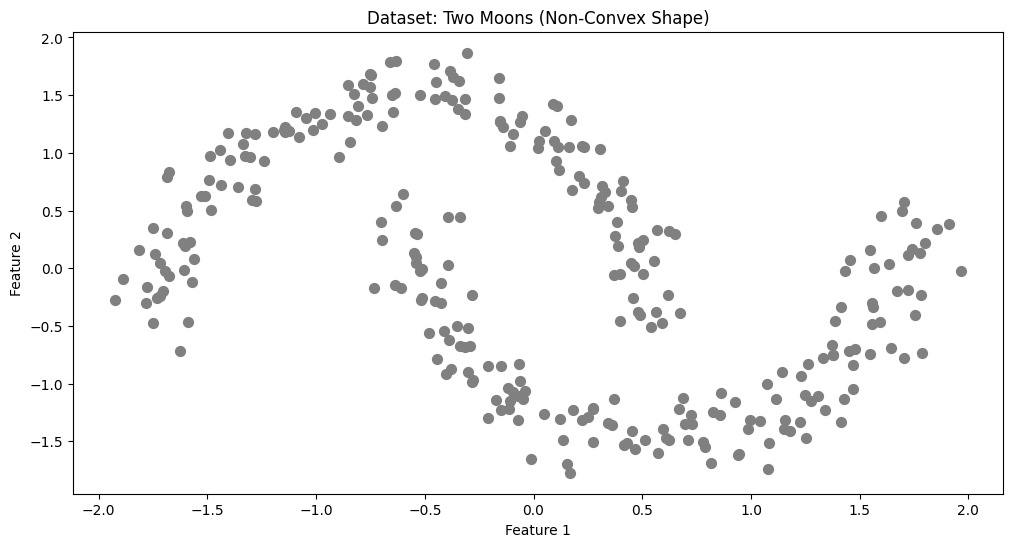

In [10]:
plt.figure(figsize=(12 ,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='gray', s=50)
plt.title("Dataset: Two Moons (Non-Convex Shape)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Why not K-Means?

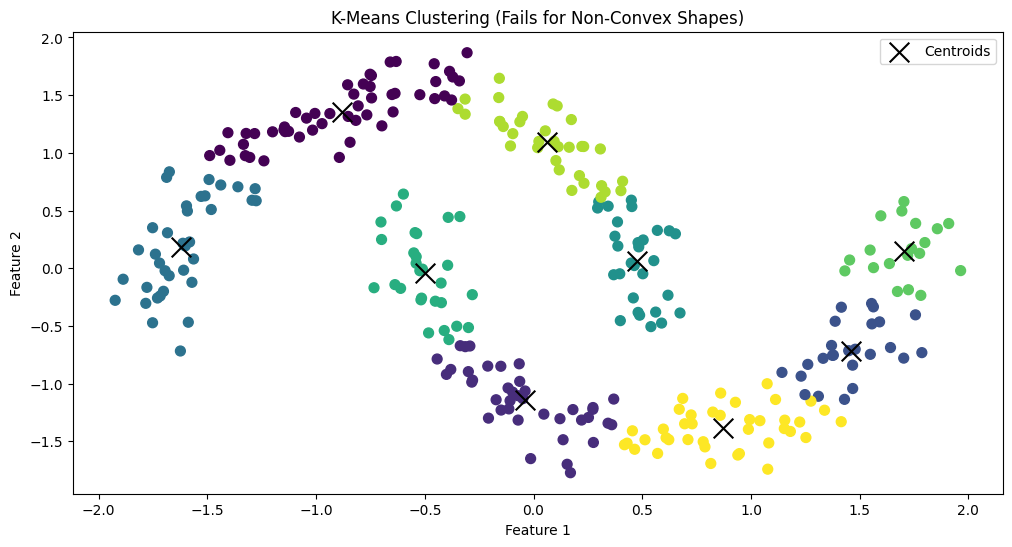

In [11]:
# Try applying K-Means with K=2
kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='black', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering (Fails for Non-Convex Shapes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Interpretation:**

- K-Means splits the dataset horizontally because it tries to draw straight (linear) boundaries.
- It fails to capture the curved moon shapes because it only optimizes distances to centroids (assuming spherical clusters).

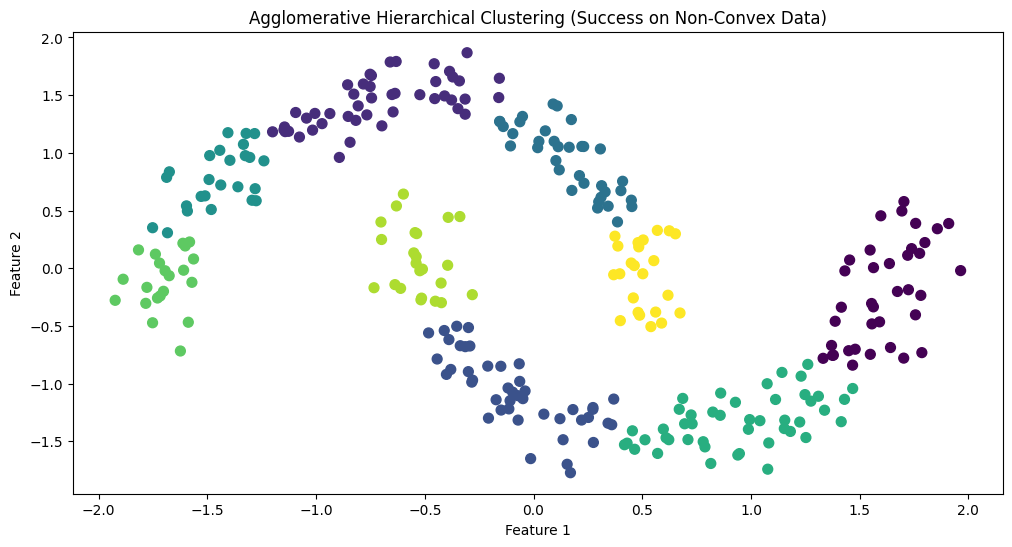

In [12]:
# Apply Agglomerative Clustering (using complete linkage)
agg = AgglomerativeClustering(n_clusters=9, linkage='complete')
y_agg = agg.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_agg, cmap='viridis', s=50)
plt.title("Agglomerative Hierarchical Clustering (Success on Non-Convex Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Interpretation**

- Hierarchical clustering looks at pairwise distances between points and clusters, so it can follow the curved structure of the data.
- The “complete linkage” method helps form compact clusters by considering the farthest distance between points in two clusters.
- The algorithm does not assume shape — hence it works beautifully here.